# Aplicación 3: Escenarios macroeconómicos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt


In [2]:
def get_data(stocks, start, end):
    prices = yf.download(stocks, start, end, progress=False)['Close']
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    matriz_cov = returns.cov()
    return mean_returns, matriz_cov

def simular_escenario(mean_returns, matriz_cov, weights, num_dias, num_simulaciones):
    portfolio_returns = np.zeros((num_simulaciones, num_dias))
    L = np.linalg.cholesky(matriz_cov)

    for i in range(num_simulaciones):
        z = np.random.normal(0, 1, (num_dias, len(weights)))
        daily_returns = np.array(mean_returns) + z @ L.T
        daily_portfolio_returns = daily_returns @ weights
        cumulative_returns = np.cumprod(daily_portfolio_returns + 1)
        portfolio_returns[i, :] = cumulative_returns

    return portfolio_returns

def ajustar_escenario(mean_returns, tipo):
    ajuste = {'base': 0, 'alcista': 0.001, 'bajista': -0.001}
    return mean_returns + ajuste[tipo]

def graficar_resultados(resultados_dict):
    # Histograma de rendimientos acumulados al final
    plt.figure(figsize=(12,5))
    for nombre, data in resultados_dict.items():
        plt.hist(data[:, -1], bins=50, alpha=0.5, label=nombre)
    plt.title("Distribución de rendimientos acumulados")
    plt.legend()
    plt.show()

    # Medias y desviaciones estándar
    medias = [np.mean(data[:, -1]) for data in resultados_dict.values()]
    desvios = [np.std(data[:, -1]) for data in resultados_dict.values()]

    escenarios = list(resultados_dict.keys())
    x = np.arange(len(escenarios))

    plt.figure(figsize=(10,5))
    plt.bar(x - 0.2, medias, width=0.4, label='Media')
    plt.bar(x + 0.2, desvios, width=0.4, label='Desviación Estándar')
    plt.xticks(x, escenarios)
    plt.title("Media y desviación estándar por escenario")
    plt.legend()
    plt.show()

def ejecutar_simulaciones(stocks, weights, num_dias=14, num_simulaciones=10000):
    start = dt.datetime.now() - dt.timedelta(days=365*4)
    end = dt.datetime.now()

    mean_returns, matriz_cov = get_data(stocks, start, end)

    escenarios = ['base', 'alcista', 'bajista']
    resultados = {}

    for escenario in escenarios:
        mean_mod = ajustar_escenario(mean_returns, escenario)
        resultados[escenario] = simular_escenario(mean_mod, matriz_cov, weights, num_dias, num_simulaciones)

    graficar_resultados(resultados)

C:\Users\alvaro.morales\AppData\Local\Temp\ipykernel_932\194643286.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks, start, end, progress=False)['Close']


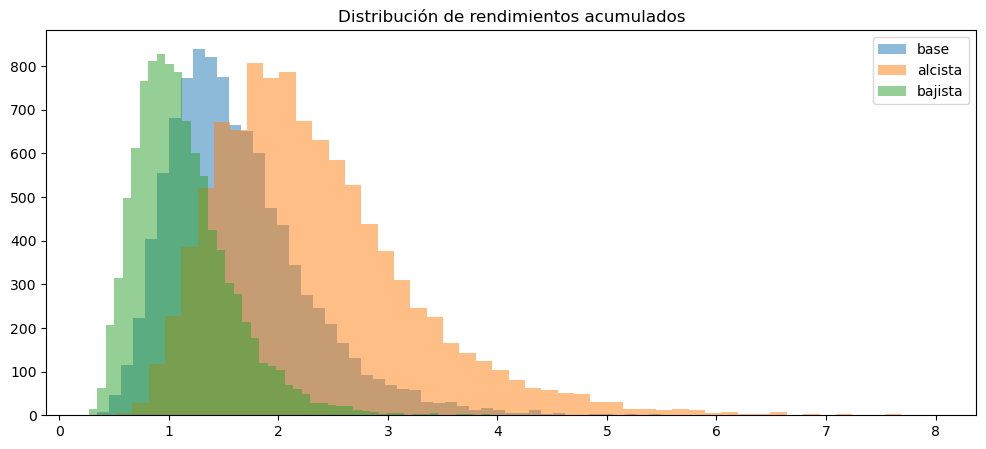

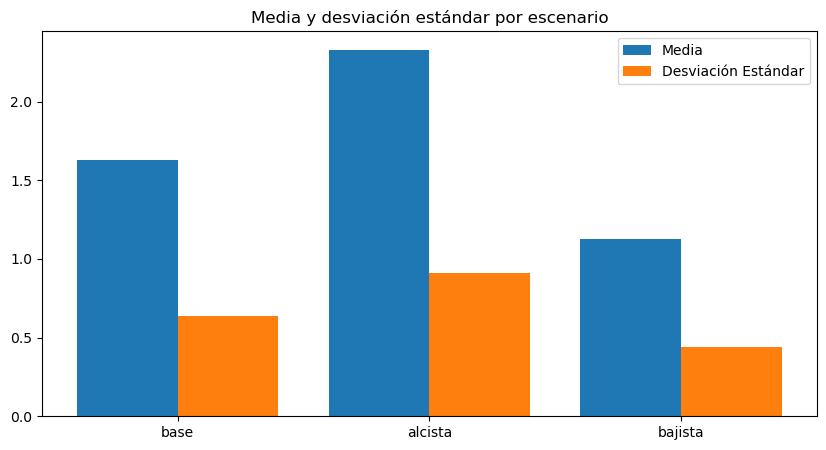

In [5]:

# Llama a la función principal 
ejecutar_simulaciones(
    stocks=["AAPL", "MSFT", "NVDA"],
    weights=[0.5, 0.2, 0.3],
    num_dias=365,
    num_simulaciones=10000
)
